In [1]:
import pandas as pd

telemetry = pd.read_csv('PdM_telemetry.csv')
#errors = pd.read_csv('PdM_errors.csv')
#maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

In [2]:
telemetry

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


In [3]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()


Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

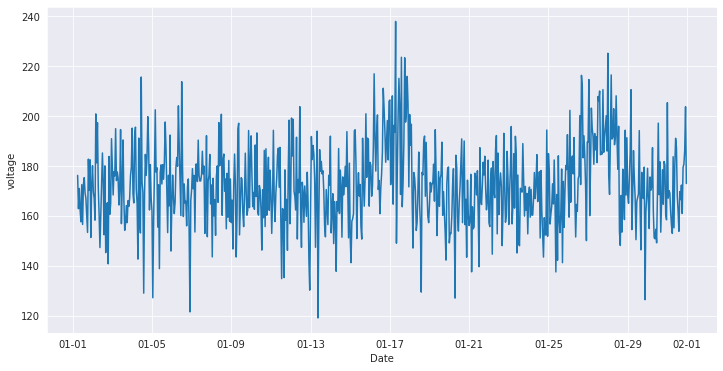

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

In [5]:
machines['model'] = machines['model'].astype('category')

In [6]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [7]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='mean').unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='std').unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [8]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',columns='machineID',values=col).rolling(window=24).mean().resample('3H',
closed='left',label='right',how='first').unstack())

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  """


In [9]:
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

In [10]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',columns='machineID',values=col).rolling(window=24).std().resample('3H',
closed='left',label='right',how='first').unstack())

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  """


In [11]:
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

In [12]:
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.ix[:, 2:6],
                            telemetry_mean_24h.ix[:, 2:6],
                            telemetry_sd_24h.ix[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional ind

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


In [13]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [14]:
df=telemetry_feat

In [15]:


from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [18]:
plot_df = df.loc[ df['machineID']==1 & (df['datetime'] > pd.to_datetime('2015-01-01')) 
                   & (df['datetime'] < pd.to_datetime('2015-02-01')),
                  ['datetime','volt']]

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [19]:
plot_df.shape

(238, 2)

In [20]:
machines

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


In [21]:
final = df.merge(machines,how='inner',left_on=['machineID'], right_on=['machineID'])

In [22]:
final

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,model3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291295,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,model4,5
291296,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,model4,5
291297,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,model4,5
291298,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,model4,5


In [23]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [24]:
failures['failure'] =1

In [25]:
final['datetime'] = pd.to_datetime( final['datetime'] )

In [26]:
failures

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,1
1,2015-03-06 06:00:00,1,1
2,2015-04-20 06:00:00,1,1
3,2015-06-19 06:00:00,1,1
4,2015-09-02 06:00:00,1,1
...,...,...,...
756,2015-11-29 06:00:00,99,1
757,2015-12-14 06:00:00,99,1
758,2015-02-12 06:00:00,100,1
759,2015-09-10 06:00:00,100,1


In [27]:
final2 = final.merge(failures, how='left',left_on=['machineID','datetime'],right_on=['machineID','datetime'])

In [36]:
failures['datetime']= pd.to_datetime(failures['datetime'])


In [37]:
final2.loc[final2['failure']!=1, 'failure']=0

In [38]:
final2

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,model3,18,0.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,model3,18,0.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,model3,18,0.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,model3,18,0.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,model3,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,model4,5,0.0
291337,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,model4,5,0.0
291338,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,model4,5,0.0
291339,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,model4,5,0.0


In [39]:
final2.head(20)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,model3,18,0.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,model3,18,0.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,model3,18,0.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,model3,18,0.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,model3,18,0.0
5,1,2015-01-02 21:00:00,163.278466,446.493166,104.387585,38.068116,21.580492,41.380958,20.725597,6.932127,...,452.267095,98.065860,40.033247,14.402740,42.626186,10.408012,5.941890,model3,18,0.0
6,1,2015-01-03 00:00:00,172.191198,434.214692,93.747282,39.716482,16.369836,14.636041,18.817326,3.426997,...,451.031783,99.273286,38.903462,15.513819,40.395881,10.833294,5.737671,model3,18,0.0
7,1,2015-01-03 03:00:00,175.210027,504.845430,108.512153,37.763933,5.991921,16.062702,6.382608,3.449468,...,447.502464,99.005946,39.389725,15.726970,39.648116,11.904700,5.601191,model3,18,0.0
8,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,453.864597,100.877342,38.696225,15.635083,41.828592,11.326412,5.583521,model3,18,0.0
9,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,454.785072,100.050567,39.449734,13.995465,40.843882,11.036546,5.561553,model3,18,0.0


In [40]:
final2['model'] = final2['model'].astype('category')

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
final2_model = ordinal_enc.fit_transform( final2[['model']] )

In [42]:


transformed = pd.DataFrame(final2_model)



In [45]:
transformed = pd.DataFrame(final2_model)

In [47]:
final3 = pd.concat([final2, transformed], axis=1).drop(['model'],axis=1)

In [48]:
final3.rename( columns={0:'model_enc'} , inplace=True)

In [50]:
final3['model_enc'].value_counts()

2.0    101964
3.0     93227
1.0     49529
0.0     46621
Name: model_enc, dtype: int64

In [51]:
final3

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,failure,model_enc
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,18,0.0,2.0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,18,0.0,2.0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,18,0.0,2.0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,18,0.0,2.0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,18,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,5,0.0,3.0
291337,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,5,0.0,3.0
291338,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,5,0.0,3.0
291339,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,5,0.0,3.0


In [ ]:
final3.rename( columns={0:'model_enc'} , inplace=True)

In [ ]:
final3

In [52]:
final3.sort_values(by=['datetime'], inplace=True)

In [53]:
final3.to_csv('final_try_join_on_datetime_not_date.csv',index=False)

In [54]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
final3.head()

In [ ]:
# final3.loc[final3['failure']!=1, 'failure']=0

In [ ]:
final3.head()

In [55]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [56]:
df_new = final3['failure']
df_new = pd.DataFrame(df_new,columns=['failure'])

final3.drop( labels=['failure'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(final3, df_new, test_size = 0.3, random_state=42,shuffle=False)

In [57]:
X_train.index = X_train['datetime']
X_train.drop(labels = ['datetime'], axis=1, inplace=True)
X_train.head(10)

/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime,,,,,,,,,,,,,,,,,,,
2015-01-02 06:00:00,1,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,18,2.0
2015-01-02 06:00:00,66,169.103113,505.267533,90.784813,38.208990,18.218470,93.075171,6.357613,3.085675,174.224002,454.544870,99.179782,39.005039,17.271628,49.147092,9.280530,4.332275,6,3.0
2015-01-02 06:00:00,5,187.597087,484.147384,98.075118,36.322241,8.951733,34.928738,4.539208,5.941135,175.674631,460.621226,97.928488,38.591031,14.915482,60.620670,10.824448,4.355144,2,2.0
2015-01-02 06:00:00,65,177.722116,476.747756,99.219211,44.063819,26.408138,24.505020,4.145903,5.951351,174.637119,456.244438,98.671649,40.301120,14.117237,36.936123,10.713532,6.815324,15,2.0
2015-01-02 06:00:00,64,159.265028,448.725838,96.397342,39.499776,10.851463,68.334022,3.840994,2.707744,170.358178,429.627475,101.803201,39.971060,15.801029,47.853095,12.275214,4.268653,20,2.0
2015-01-02 06:00:00,91,162.545529,365.148031,108.810166,39.115610,44.787455,66.632073,14.895834,3.771685,172.677564,379.883239,102.092927,40.995226,19.663080,50.374945,9.646278,4.098018,17,3.0
2015-01-02 06:00:00,63,161.319620,457.876304,102.221594,38.362926,5.391863,24.384513,8.308642,11.032338,170.603095,446.087882,99.663825,40.234220,13.233187,33.051731,10.507465,4.479256,14,3.0
2015-01-02 06:00:00,62,170.746298,449.187509,103.191387,37.476938,23.387535,9.198349,0.556924,1.410060,165.228217,450.103250,100.385368,38.030362,11.898731,40.226843,9.887492,5.591492,20,3.0
2015-01-02 06:00:00,61,173.275431,445.325714,101.407412,40.843174,3.821332,19.807992,8.718029,3.515360,176.344493,455.584620,104.607600,41.304336,15.702883,52.054149,12.549604,5.564369,2,3.0


In [58]:
scaler = StandardScaler()
X_train1 = X_train.copy()
X_train1 = scaler.fit_transform(X_train1)
indexes = X_train.index
columns = X_train.columns
X_train1 = pd.DataFrame(X_train1)
X_train1.index = indexes
X_train1.columns = columns
X_train1

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime,,,,,,,,,,,,,,,,,,,
2015-01-02 06:00:00,-1.714743,0.983152,-0.181024,-0.906610,0.331461,1.152445,0.186351,-1.450040,2.410647,-0.224772,-0.078095,-0.858325,-0.006081,-1.621710,-0.158024,0.025307,1.064246,1.144533,0.162049
2015-01-02 06:00:00,0.536976,-0.178150,1.772904,-1.362430,-0.628415,0.707060,2.095063,-0.542310,-0.583237,0.722227,0.440244,-0.348596,-0.671818,1.043729,-0.101964,-0.443605,-0.833482,-0.914637,1.115019
2015-01-02 06:00:00,-1.576176,1.768884,1.134677,-0.371404,-1.170230,-0.622485,-0.409974,-0.933273,0.646551,1.028170,0.776561,-0.616288,-0.871526,0.003710,1.394942,0.462083,-0.804947,-1.601027,0.162049
2015-01-02 06:00:00,0.502334,0.729253,0.911069,-0.215878,1.052908,1.882073,-0.859043,-1.017835,0.650951,0.809355,0.534312,-0.457302,-0.046620,-0.348641,-1.695073,0.397018,2.264715,0.629741,0.162049
2015-01-02 06:00:00,0.467692,-1.213897,0.064278,-0.599477,-0.257742,-0.349921,1.029177,-1.083392,-0.746005,-0.093091,-0.938897,0.212638,-0.205833,0.394597,-0.270786,1.313128,-0.912866,1.487728,0.162049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-14 03:00:00,0.987320,0.435818,-2.456286,0.682330,-1.904595,2.408934,-0.913862,-0.843433,-1.287274,-0.291639,-4.693168,-0.122248,-1.251566,0.319471,-0.761608,0.543118,0.792146,0.458143,0.162049
2015-09-14 03:00:00,1.056603,-0.323025,-1.912726,-0.240073,0.367094,0.258765,0.968274,-0.455485,0.008595,-0.021030,0.354153,-0.316028,0.271278,-0.351267,0.054463,-0.323016,0.466019,-1.772625,1.115019
2015-09-14 03:00:00,-1.645459,-0.171780,-2.667314,0.012795,-1.099240,0.058981,1.938420,0.384591,-0.486219,-0.539828,-1.813771,-0.467664,-0.056213,1.207961,-0.115291,1.165560,-1.216037,-0.571442,0.162049


In [59]:
X_test.index = X_test['datetime']
X_test.drop(labels = ['datetime'],axis=1, inplace=True)
X_test.head(10)


/home/darren/anaconda3/envs/virtualspace/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime,,,,,,,,,,,,,,,,,,,
2015-09-14 03:00:00,100,173.497749,432.894504,95.192863,37.952828,8.483598,74.608989,17.494623,4.245231,172.677966,436.209430,102.619343,38.652621,10.148126,52.640976,8.912952,3.651367,5,3.0
2015-09-14 03:00:00,86,162.630935,448.823799,101.293653,38.963979,23.272926,57.092998,7.209824,4.963042,172.148165,464.365152,102.502234,38.870133,18.383292,55.843909,10.448036,5.039742,2,2.0
2015-09-14 03:00:00,67,166.077626,458.961527,94.523864,34.364949,17.931034,16.889914,9.270116,5.983700,167.121379,435.138141,99.092907,39.714304,14.312846,59.027275,8.434882,4.850529,14,3.0
2015-09-14 03:00:00,76,174.906842,477.304573,97.407305,39.999882,10.019026,108.952273,6.823686,4.326181,170.087338,435.455785,97.731872,39.419806,13.522691,63.401578,8.650183,5.290431,10,1.0
2015-09-14 03:00:00,80,162.185040,453.534762,91.712824,37.820847,7.200339,24.812711,2.537986,4.731347,168.863454,454.190943,102.707980,39.735794,17.924582,53.395057,10.586629,5.306480,6,2.0
2015-09-14 03:00:00,44,162.936931,408.832356,91.156253,41.907141,14.750389,35.351444,10.973294,4.283643,171.510223,436.360317,102.993235,40.005173,18.589791,56.346824,13.110703,4.465571,7,3.0
2015-09-14 03:00:00,84,175.377019,428.102386,107.442453,43.477098,21.018905,41.090526,11.843227,0.162399,170.043227,453.155125,98.056823,40.011457,16.171094,50.620373,8.950975,5.098888,9,2.0
2015-09-14 03:00:00,30,170.069011,475.663565,92.501886,38.134982,8.578058,86.742125,9.367346,3.524940,172.347260,437.806564,101.942488,39.936034,13.736739,43.448992,9.075876,4.987195,20,2.0
2015-09-14 03:00:00,73,158.782797,438.790141,97.863153,54.729966,11.314499,45.259238,4.658198,1.536994,163.701761,452.536167,99.237506,49.551039,15.132527,44.181624,10.846471,5.095843,20,1.0


In [60]:
X_test1 = X_test.copy()
X_test1 = scaler.fit_transform(X_test1)
X_test1 = pd.DataFrame(X_test1)
indexes = X_test.index
X_test1.index = indexes
X_test1.columns = columns
X_test1.head(10)

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,age,model_enc
datetime,,,,,,,,,,,,,,,,,,,
2015-09-14 03:00:00,1.714866,0.292344,-0.413166,-0.766635,-0.693390,-0.695259,1.297091,1.841275,-0.085248,0.420657,-0.574926,0.339307,-0.837336,-2.133287,0.342852,-0.667060,-1.702264,-1.086386,1.114999
2015-09-14 03:00:00,1.229860,-0.851623,0.066305,0.042640,-0.401691,1.429478,0.542946,-0.361773,0.224680,0.307187,0.976766,0.315301,-0.730438,1.528124,0.757627,0.218112,0.041974,-1.601199,0.162069
2015-09-14 03:00:00,0.571637,-0.488784,0.371450,-0.855379,-1.728428,0.662025,-1.187984,0.079550,0.665368,-0.769425,-0.633966,-0.383579,-0.315560,-0.281623,1.169867,-0.942729,-0.195737,0.458052,1.114999
2015-09-14 03:00:00,0.883427,0.440682,0.923575,-0.472888,-0.102852,-0.474669,2.775729,-0.444485,-0.050297,-0.134191,-0.616460,-0.662578,-0.460294,-0.632932,1.736332,-0.818580,0.356920,-0.228365,-0.790861
2015-09-14 03:00:00,1.022000,-0.898564,0.208105,-1.228266,-0.731464,-0.879621,-0.846871,-1.362500,0.124641,-0.396316,0.416055,0.357477,-0.304998,1.324179,0.440504,0.298028,0.377082,-0.914782,0.162069
2015-09-14 03:00:00,-0.225158,-0.819411,-1.137436,-1.302095,0.447358,0.205071,-0.393129,0.444378,-0.068663,0.170555,-0.566610,0.415952,-0.172609,1.619935,0.822753,1.753481,-0.679366,-0.743178,1.114999
2015-09-14 03:00:00,1.160573,0.490178,-0.557409,0.858284,0.900262,1.105650,-0.146035,0.630722,-1.848086,-0.143638,0.358970,-0.595966,-0.169520,0.544566,0.081187,-0.645135,0.116281,-0.399969,0.162069
2015-09-14 03:00:00,-0.710164,-0.068605,0.874181,-1.123596,-0.640842,-0.681688,1.819479,0.100378,-0.396247,0.349828,-0.486906,0.200559,-0.206588,-0.537765,-0.847494,-0.573114,-0.024041,1.487677,0.162069
2015-09-14 03:00:00,0.779497,-1.256723,-0.235708,-0.412419,4.146511,-0.288552,0.033447,-0.908342,-1.254580,-1.501821,0.324858,-0.353937,4.518820,0.082812,-0.752620,0.447861,0.112455,1.487677,-0.790861


In [61]:
from tensorflow import keras
X_train.shape[1:]

(19,)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

In [63]:


model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',metrics=['accuracy'])



In [64]:
history = model.fit( X_train1, y_train, epochs=8 )

Train on 203938 samples
Epoch 1/8
203938/203938 [==============================] - 27s 132us/sample - loss: 0.0258 - accuracy: 0.9971
Epoch 2/8
203938/203938 [==============================] - 27s 131us/sample - loss: 0.0157 - accuracy: 0.9974
Epoch 3/8
203938/203938 [==============================] - 25s 123us/sample - loss: 0.0145 - accuracy: 0.9974
Epoch 4/8
203938/203938 [==============================] - 25s 123us/sample - loss: 0.0139 - accuracy: 0.9974
Epoch 5/8
203938/203938 [==============================] - 25s 123us/sample - loss: 0.0136 - accuracy: 0.9974
Epoch 6/8
203938/203938 [==============================] - 25s 123us/sample - loss: 0.0133 - accuracy: 0.9974
Epoch 7/8
203938/203938 [==============================] - 25s 124us/sample - loss: 0.0131 - accuracy: 0.9974
Epoch 8/8
203938/203938 [==============================] - 25s 124us/sample - loss: 0.0130 - accuracy: 0.9974


In [65]:
model.evaluate(X_test1,y_test)

87403/87403 [==============================] - 6s 69us/sample - loss: 0.0119 - accuracy: 0.9976


[0.011900723849256748, 0.9976431]